#### Here I am building a project to predict car price based on various parameters. I am using lInear regression algorithm from scratch. The dataset is obtained from Kaggle. I will also try to improve the RMSE by regularization.

In [63]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# importing dataset
df=pd.read_csv('data.csv')

#### Doing some exploratory data analysis and doing further steps

In [65]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [66]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [67]:
# Lower columns names and some basic replacements
df.columns=df.columns.str.lower().str.replace(' ','_')


In [68]:
# Similarly I am doing for values of string columns
str_col=list(df.dtypes[df.dtypes=='object'].index)
for i in str_col:
    df[i]=df[i].str.lower().str.replace(' ','_')

In [69]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


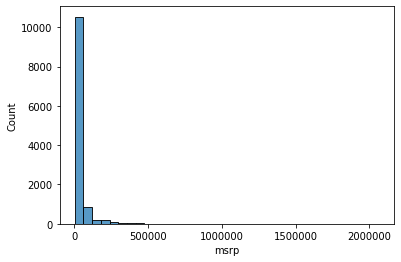

In [70]:
# The target variable is msrp or price of the car so analysing it.
# Plotting a histogran
sns.histplot(df['msrp'],bins=35)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

##### Here I observe immediately that the distribution of prices has a long tail. So zooming in to have a look.

<AxesSubplot:xlabel='msrp', ylabel='Count'>

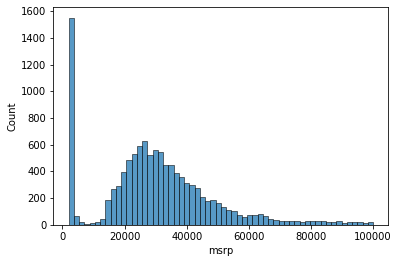

In [71]:
sns.histplot(df.msrp[df.msrp<100000])

##### Here I saw that a few cars cost more than 2000 so there are a lot of cars having price between 1 to 2k. Its not a normal distribution so this type of data have a bad impact on model so we can transform this to make it look like approximate normal so that linear regression could work well

In [72]:
# transforming
log_price=np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

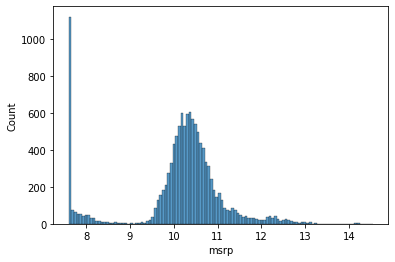

In [73]:
sns.histplot(log_price)

In [74]:
# Although its not proper normal but much similar to that

In [75]:
# Checking for missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [76]:
# Splitting the dataset into train,test and validation dataset
n=len(df) # length of whole dataset
n_val=int(0.2*n) # length of validation dataset
n_test=int(0.2*n) # Length of testing dataset
n_train=n-n_val-n_test # length of training dataset

In [77]:
# Shuffle 
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

In [78]:
# Shuffle dataset into 3 sets : train,test,validation
df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

##### As I observed above that long tail so I am removing that tail using log transform and delete the target from training sets

In [79]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

##### Now I have done preprocessing we have to design the machine learning model so using linear regression. I am doing it from scratch but it can be done by using scikit learn framework also.

In [80]:
# Defining Linear Regression function
def Linear_Regression(X,y):
    ones=np.ones(X.shape[0])
    # adding array of 1s to main matrix X
    X=np.column_stack([ones,X])
    # normal equation
    XTX=X.T.dot(X)
    XTX_inverse=np.linalg.inv(XTX)
    w=XTX_inverse.dot(X.T).dot(y)
    return w[0],w[1:] # Here splitting weight vector into bias and other terms

In [81]:
# Now I have trained linear regression model so I need to predict the prices
# Taking only some of numerical features for the base model
first=['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg','popularity']
new_df=df_train[first]
# Before proceeding to predict price I know that there are multiple missing values in data so I am not dropping them as I can lose 
# information so replacing them with some number ex-0 as there are not so much missing values in features I chose.
#  Also I can replace this with mean or median value but first trying with 0.
new_df=new_df.fillna(0)
# convert new_df to a numpy matrix
X_train=new_df.values


In [94]:
# Implementing a function to convert dataframe to numpy array so I have not to do same things again using same columns as defined earlier.
def convert(df):
    df_new=df[first]
    df_new=df_new.fillna(0)
    X=df_new.values
    return X

In [83]:
# Training linear regression
w0,w=Linear_Regression(X_train,y_train)

In [86]:
# making prediction
y_pred=w0+X_train.dot(w)

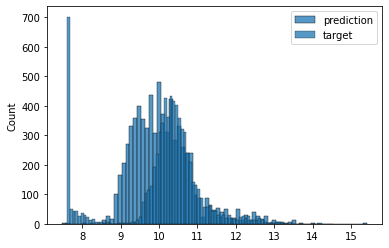

In [87]:
# Comparig 2 histplots of prices for comparison
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

##### The predicted values distribution looks very different from training data and it shows underfitting as I used only 5 features so I need to add more features to the model. It denotes that the model is likely to underfit.

##### Another way to check accuarcy is Root Mean Square error. Its minimum value is desired i.e. minimum the value less the error in the predictions.So I am implementing it also.

In [88]:
def rmse(y,y_pred):
    error=y-y_pred
    mean_squared_error=(error**2).mean()
    return np.sqrt(mean_squared_error).round(2)

In [89]:
# Checking RMSE for the predictions just made
rmse(y_train,y_pred)

0.76

##### The RMSE obtained above is for training set but I defined validation set also so checking on that so that I can decide which model to use later if I get some change in RMSE.

In [95]:
# Checking RMSE for validation set
X_train=convert(df_train)
w0_new,w_new=Linear_Regression(X_train,y_train)
X_val=convert(df_val)
y_preds=w0_new+X_val.dot(w_new)
print('Validation RMSE:',rmse(y_val,y_preds))

Validation RMSE: 0.76


##### Here the RMSE for training and validation set is same so I need to add more features to the model to check if it makes good predictions

##### A basic feature would be to add the age of car. So adding that

In [101]:
# checking head of df
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [100]:
# checking max year to subtract from that and form new age feature
df.year.max()

2017

In [102]:
# Here I am extedending my convert function because I may need to add more features and convert to numpy arrays.
def convert(df):
    df=df.copy()
    features=first.copy()
    df['age']=2017-df.year
    features.append('age')
    new_df=df[features]
    new_df=new_df.fillna(0)
    X=new_df.values
    return X

In [105]:
# Checking if the addition of feature makes some difference
X_train = convert(df_train)
w_0_, w_ = Linear_Regression(X_train, y_train)
X_val = convert(df_val)
y_pred_ = w_0_ + X_val.dot(w_)
print('validation RMSE:', rmse(y_val, y_pred_))

validation RMSE: 0.52


##### Addition of feature decreases RMSE significantly so it works.

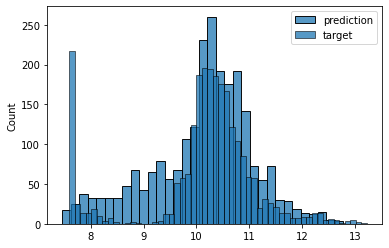

In [106]:
# Checking the plots
sns.histplot(y_pred_, label='prediction')
sns.histplot(y_val, label='target')
plt.legend()

##### Now the distributions look quite alike. So I will do further feature engineering.